<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem</a></span></li><li><span><a href="#Algebraic-solution" data-toc-modified-id="Algebraic-solution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Algebraic solution</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simulation</a></span></li></ul></div>

# Problem

In this game, you have to exit a room. There are 3 doors:
1. If you go through door A, you exit in `t_0` seconds, and the game is over;
1. If you go through door B, you go back to the same room (but with the doors shuffled) in `t_1` seconds;
1. If you go through door C, you go back to the same room (but with the doors shuffled) in `t_2` seconds.

You don't know which door is A, B or C.

What is the expected time to finish the game?

# Algebraic solution

Probability of exiting after opening:
- 1 door: $P[d=1] = \frac{1}{3}$
- 2 doors: $P[d=2] = \frac{2}{3}\frac{1}{3}$
- 3 doors: $P[d=3] = \left(\frac{2}{3}\right)^2\frac{1}{3}$
- ...
- $n$ doors: $P[d=n] = \left(\frac{2}{3}\right)^{n-1}\frac{1}{3}$

For simplicity, let's first assume that `t_1` = `t_2`.

Expected time to exit after opening:
- 1 door: $T[d=1] = t_0$
- 2 doors: $T[d=2] = t_1 + t_0$
- 3 doors: $T[d=3] = 2 t_1 + t_0$
- ...
- $n$ doors: $T[d=n] = (n-1)t_1 + t_0$

$$ \begin{align}
E[t] & = \sum_{n=1}^\infty{P[d=n]T[d=n]} \\
     & = \sum_{n=1}^\infty{\left(\frac{2}{3}\right)^{n-1}\frac{1}{3} \left((n-1)t_1 + t_0\right)} \\
     & = \frac{1}{3} \times \left[ t_1 \times \sum_{n=1}^\infty{ \left(\frac{2}{3}\right)^{n-1} (n-1) } + t_0 \times \sum_{n=1}^\infty{\left(\frac{2}{3}\right)^{n-1}} \right]
\end{align} $$

Let's define: $S(f) \equiv \sum_{n=1}^\infty{f^{n-1}}$, and we want $S\left(\frac{2}{3}\right)$.

$$f S(f) = \sum_{n=1}^\infty{f^{n}} = \sum_{n=2}^\infty{f^{n-1}} = \sum_{n=1}^\infty{f^{n-1}} - f^{1-1} = S(f) - 1$$

Therefore: $S(f) = \frac{1}{1-f} \implies S\left(\frac{2}{3}\right) = 3$

For the other sum, we need (also with $f = \frac{2}{3}$):

$$
\sum_{n=1}^\infty{(n-1)f^{n-1}} = f \sum_{n=1}^\infty{(n-1)f^{n-2}} = f \frac{dS(f)}{df} = f \frac{d}{df} \left( \frac{1}{1-f} \right) = f \frac{1}{(1-f)^2} = 6 \text{ (for $f=2/3$)}
$$

Therefore:

$$
\boxed{E[t] = \frac{1}{3} \times [ 6 t_1 + 3 t_0 ] = 2 t_1 + t_0}
$$

If there are $D$ doors, $f = \frac{2}{3} \rightarrow f = \frac{D-1}{D}$, and $1 - f = \frac{1}{3} \rightarrow 1 - f = \frac{1}{D}$. Therefore:

$$
E[t; D] = (1-f) \times \left[ t_1 \times f \frac{1}{(1-f)^2} + t_0 \times \frac{1}{1-f} \right] = t_1 \times \frac{f}{1-f} + t_0
$$
$$
\boxed{E[t; D] = (D-1) t_1 + t_0}
$$

When $t_1 \neq t_2$, the expected time to exit after opening:
- 1 door: $T[d=1] = t_0$
- 2 doors: $T[d=2] = t_0 + (t_1+t_2)/2$
- 3 doors: $T[d=3] = t_0 + (t_1+t_1)/4 + (t_1+t_2)/4 + (t_2+t_1)/4 + (t_2+t_2)/4 = t_0 + 1/2^2 \times \left[ 2\binom{2}{2} + 1\binom{2}{1} \right] \times (t_1 + t_2) $
- 4 doors: $T[d=4] = t_0 + (t_1+t_1+t_1)/8 + (t_1+t_1+t_2)/8 + (t_1+t_2+t_1)/8 + (t_1+t_2+t_2)/8 + (t_2+t_1+t_1)/8 + (t_2+t_1+t_2)/8 + (t_2+t_2+t_1)/8 + (t_2+t_2+t_2)/8 = t_0 + 1/2^3 \times \left[ 3\binom{3}{3} + 2\binom{3}{2} + 1\binom{3}{1} \right] \times (t_1 + t_2)$
- ...
- $n$ doors: $T[d=n] = t_0 + 1/2^{n-1} \times \left[ \sum_{k=1}^{n-1}{k\binom{n-1}{k}} \right] \times (t_1 + t_2)$

Let's calculate:

$$ \begin{align}
S_n & \equiv \sum_{k=1}^{n-1}{k\binom{n-1}{k}} \\
    & = \sum_{k=1}^{n-1}{k\frac{(n-1)!}{k!(n-1-k)!}} \\
    & = (n-1) \sum_{k=1}^{n-1}{\frac{(n-2)!}{(k-1)!(n-1-k)!}} \\
    & = (n-1) \sum_{k=1}^{n-1}{\binom{n-2}{k-1}} \\
    & = (n-1) \sum_{k=0}^{n-2}{\binom{n-2}{k}} \\
    & = (n-1) 2^{n-2}
\end{align} $$

Therefore:

$$ \begin{align}
E[t] & = \sum_{n=1}^\infty{P[d=n]T[d=n]} \\
     & = \sum_{n=1}^\infty{\left(\frac{2}{3}\right)^{n-1}\frac{1}{3} \left(t_0 + 1/2^{n-1} \times (n-1) 2^{n-2} \times (t_1 + t_2) \right) } \\
     & = \frac{1}{3} t_0 \sum_{n=1}^\infty{ \left(\frac{2}{3}\right)^{n-1} } + \frac{t_1 + t_2}{3 \times 2} \sum_{n=1}^\infty{ (n-1)\left(\frac{2}{3}\right)^{n-1} } \\
     & = \frac{1}{3} t_0 3 + \frac{t_1 + t_2}{6} 6
\end{align} $$

Finally:
$$
\boxed{E[t] = t_0 + t_1 + t_2}
$$

# Simulation

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
from typing import List

In [2]:
doors_time = [5, 23, 50, 189, 38]
N_simulations = 10000

N_doors = len(doors_time)


def time_to_leave(rand: np.random.RandomState,
                  t: float = 0,
                  N_doors: int = N_doors,
                  times: List[float] = doors_time) -> float:
    door = rand.choice(N_doors)
    if door == 0:
        return t + times[door]
    else:
        return time_to_leave(rand, t=t + times[door])


times = [time_to_leave(np.random.RandomState(seed=ss))
         for ss in range(N_simulations)]

In [3]:
avg_simulation = sum(times) / len(times)
avg_theory = sum(doors_time)

print(f'Expected value (simulation) = {avg_simulation:f}')
print(f'Expected value (theory)     = {avg_theory:f}')

Expected value (simulation) = 304.608800
Expected value (theory)     = 305.000000


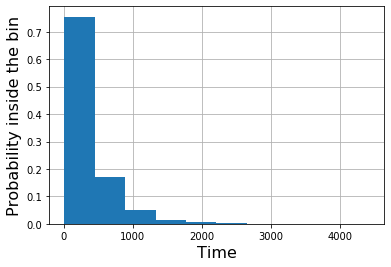

In [4]:
fig, ax = plt.subplots()

ax.hist(times, weights=np.ones_like(times)/len(times))
ax.grid(True)
ax.set_axisbelow(True)

ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Probability inside the bin', fontsize=16);